In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\AL\Downloads\udemy ML\Car projects\datasets\car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df1=df.drop('Car_Name',axis=1)
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
df1['Total_years']=2024-df1['Year']
df2=df1.drop('Year',axis=1)
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [9]:
df2['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [10]:
df2['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [12]:
df2['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

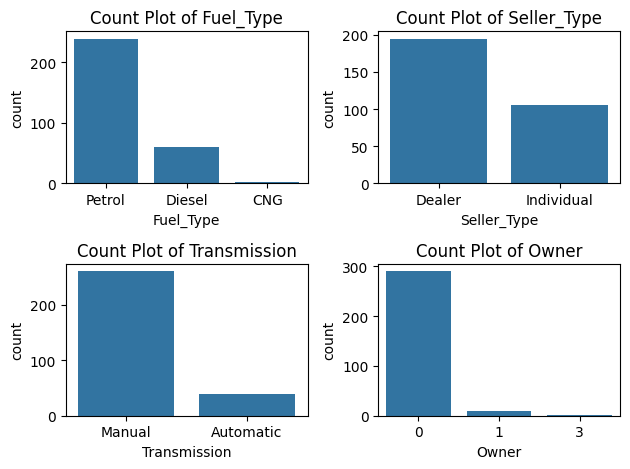

In [15]:
categorical_cols=['Fuel_Type','Seller_Type','Transmission','Owner']
for i, column in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()

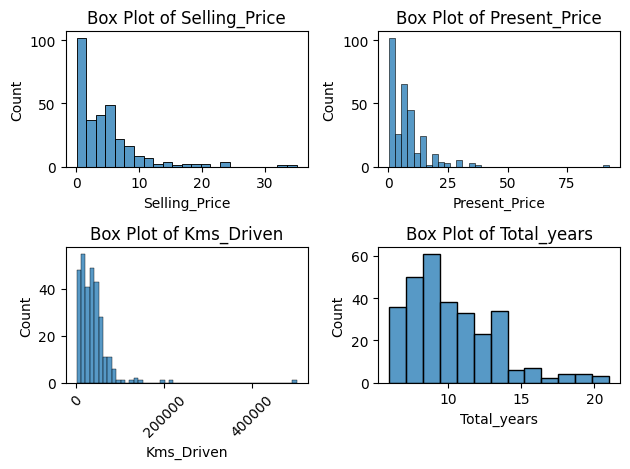

In [16]:
num_cols=df2[['Selling_Price','Present_Price','Kms_Driven','Total_years']]
plt.subplot(2, 2, 1)
sns.histplot(x='Selling_Price',data=df2)
plt.title('Box Plot of Selling_Price')

plt.subplot(2, 2, 2)
sns.histplot(x='Present_Price', data=df2)
plt.title('Box Plot of Present_Price')

plt.subplot(2, 2, 3)
sns.histplot(x='Kms_Driven', data=df2)
plt.xticks(rotation=45)
plt.title('Box Plot of Kms_Driven')


plt.subplot(2, 2, 4)
sns.histplot(x='Total_years', data=df2)
plt.title('Box Plot of Total_years')

plt.tight_layout()
plt.show()

In [17]:
#encoding 'Fuel_type column'
df2.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding 'Seller_type column'
df2.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding 'Transmission'
df2.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\AL\AppData\Local\Temp\ipykernel_1424\2091555729.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\AL\AppData\Local\Temp\ipykernel_1424\2091555729.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\AL\AppData\Local\Temp\ipykernel_1424\2091555729.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain

In [18]:
df2.tail()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Total_years
296,9.50,11.6,33988,1,0,0,0,8
297,4.00,5.9,60000,0,0,0,0,9
298,3.35,11.0,87934,0,0,0,0,15
299,11.50,12.5,9000,1,0,0,0,7
300,5.30,5.9,5464,0,0,0,0,8


In [19]:
df2.to_csv('cleaned.csv',index=False)

In [20]:
#Independent and dependent features
X=df2.drop('Selling_Price',axis=1)
Y=df2['Selling_Price']

In [21]:
#Test-Train split
from sklearn.model_selection import train_test_split
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [22]:
X_train.shape,X_test.shape,y_train.shape

((240, 7), (61, 7), (240,))

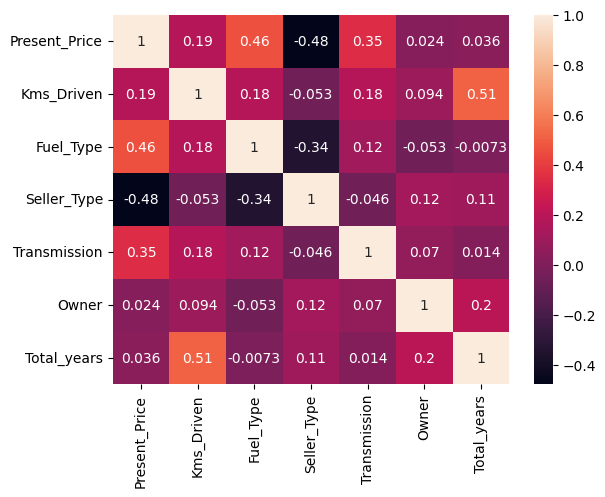

In [23]:
cor=X_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

#Feature Scaling/Standardisation

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Linear Regression

mean absolute error, 1.2217615462332732
r2, 0.8468053957657423


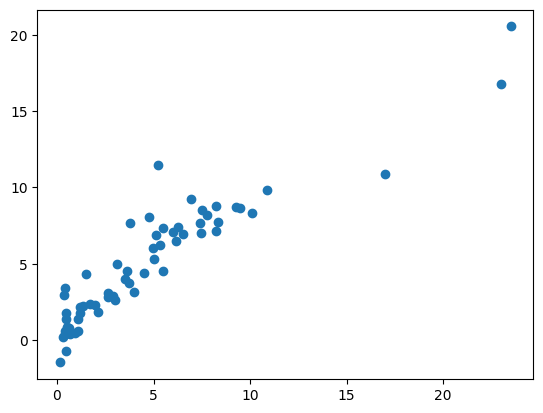

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)


In [28]:
adjusted_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjusted_r2

0.8265721461498969

Assumptions

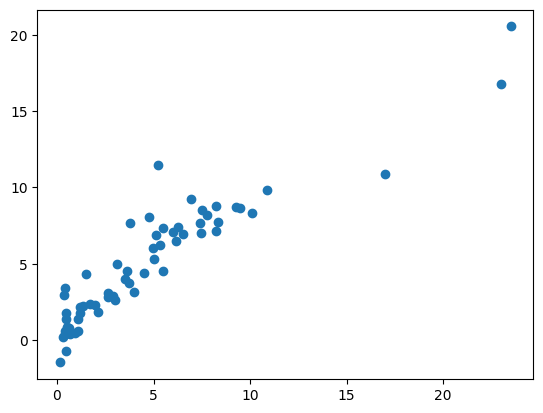

In [29]:
plt.scatter(y_test,y_pred)

Linearly Distributed

C:\Users\AL\AppData\Local\Temp\ipykernel_1424\173451723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


177   -2.616705
289    1.807442
228   -1.106208
198    1.618150
60    -2.307139
         ...   
234    1.001138
296    0.879216
281    0.289145
285   -0.272999
182    0.089014
Name: Selling_Price, Length: 61, dtype: float64


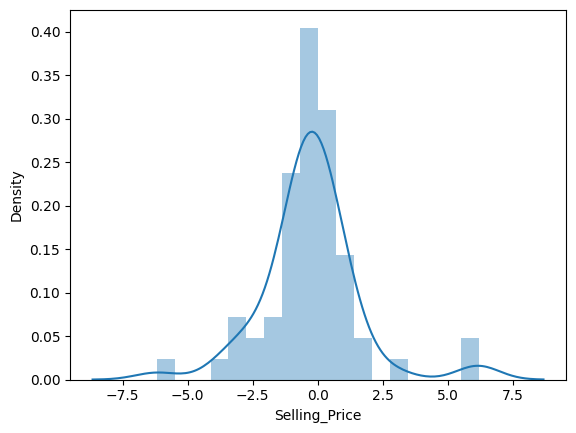

In [30]:
residuals=y_test-y_pred
sns.distplot(residuals,kde=True)
print(residuals)


<Axes: xlabel='Selling_Price', ylabel='Count'>

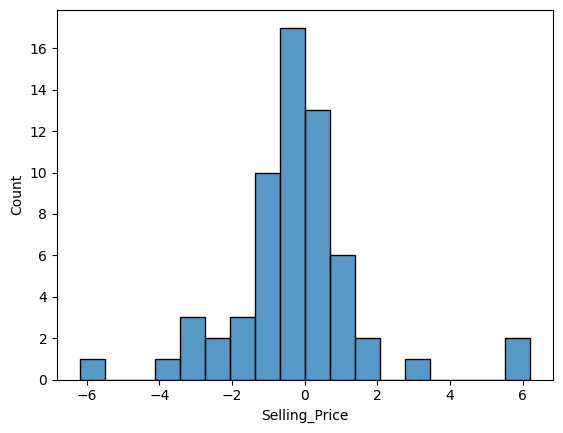

In [31]:
sns.histplot(residuals)

The residuals follow a normal distribution

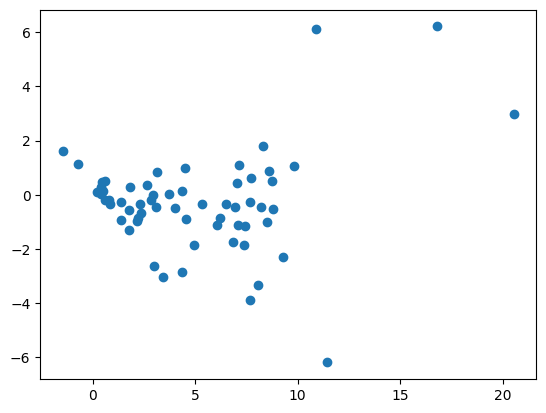

In [32]:
plt.scatter(y_pred,residuals)

In the above graph, the datapoints are unformily distributed without any specific pattern

Lasso Regression

mean absolute error, 1.9655357957781596
r2, 0.6738903657971529


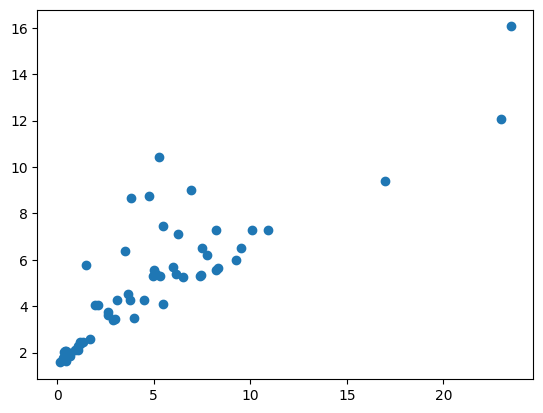

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)


Cross validation Lasso

In [34]:
from sklearn.linear_model import LassoCV
lassoCV=LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)



LassoCV(cv=5)

In [35]:
lassoCV.alphas_

array([4.57356575, 4.26532272, 3.97785425, 3.70976019, 3.45973476,
       3.22656022, 3.00910086, 2.80629753, 2.61716247, 2.44077448,
       2.27627445, 2.12286117, 1.97978743, 1.84635639, 1.72191815,
       1.60586663, 1.49763659, 1.3967009 , 1.30256793, 1.21477921,
       1.13290716, 1.05655301, 0.98534487, 0.91893592, 0.85700272,
       0.7992436 , 0.74537726, 0.69514133, 0.64829113, 0.60459848,
       0.56385056, 0.52584892, 0.49040846, 0.45735657, 0.42653227,
       0.39778542, 0.37097602, 0.34597348, 0.32265602, 0.30091009,
       0.28062975, 0.26171625, 0.24407745, 0.22762745, 0.21228612,
       0.19797874, 0.18463564, 0.17219181, 0.16058666, 0.14976366,
       0.13967009, 0.13025679, 0.12147792, 0.11329072, 0.1056553 ,
       0.09853449, 0.09189359, 0.08570027, 0.07992436, 0.07453773,
       0.06951413, 0.06482911, 0.06045985, 0.05638506, 0.05258489,
       0.04904085, 0.04573566, 0.04265323, 0.03977854, 0.0370976 ,
       0.03459735, 0.0322656 , 0.03009101, 0.02806298, 0.02617

mean absolute error, 1.2327861845423196
r2, 0.8403882998791956


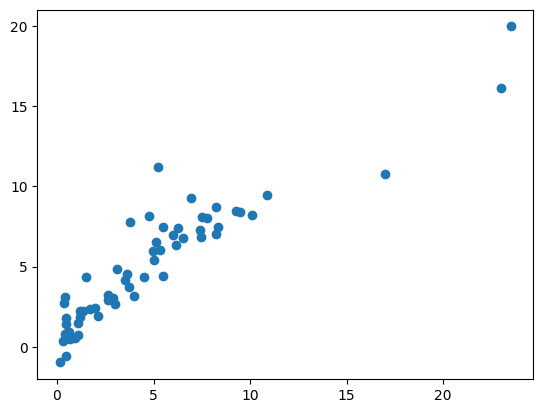

In [36]:
y_pred=lassoCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)

RIDGE REGRESSION

mean absolute error, 1.2228360849339597
r2, 0.8462917558628495


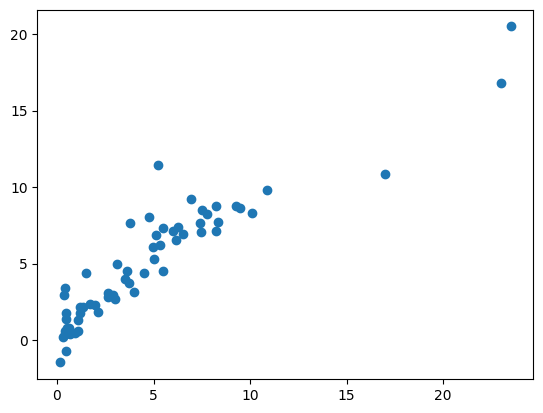

In [37]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)

mean absolute error, 1.2327009826445885
r2, 0.8413246792434111


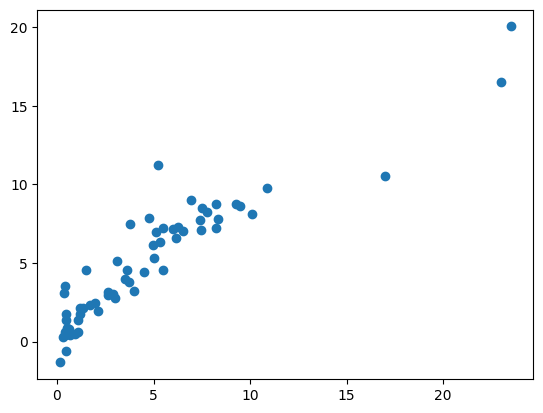

In [38]:
from sklearn.linear_model import RidgeCV
ridgeCV=RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred=ridgeCV.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)

Elastic Net

mean absolute error, 1.7149434207522527
r2, 0.6951039482907874


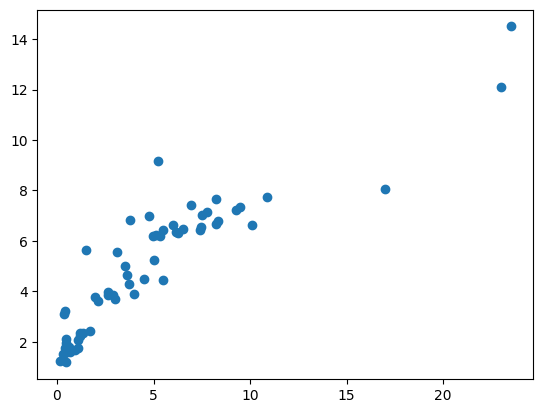

In [39]:
from sklearn.linear_model import ElasticNet
Elastic=ElasticNet()
Elastic.fit(X_train_scaled,y_train)
y_pred=Elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)

mean absolute error, 1.2228360849339597
r2, 0.8462917558628495


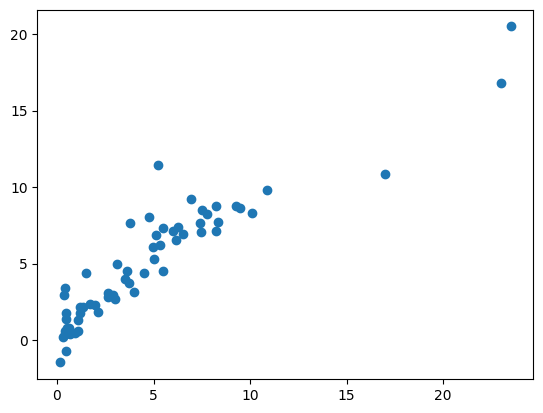

In [40]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV()
elasticcv.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("mean absolute error,",mae)
print("r2,",r2)
plt.scatter(y_test,y_pred)

Pickling the ML model and preprocessing model, scaler

In [44]:
import pickle
pickle.dump(ridge,open('rid.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))